In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
import warnings
warnings.filterwarnings("ignore")

In [4]:
#file upload
from google.colab import files


uploaded = files.upload()

Saving PCOS_data_without_infertility.xlsx to PCOS_data_without_infertility.xlsx


In [5]:
# Load the dataset
df = pd.read_excel("PCOS_data_without_infertility.xlsx", sheet_name="Full_new")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [7]:
df_cleaned = df.drop(columns=['Sl. No', 'Patient File No.', 'Unnamed: 44'], errors='ignore')
df_cleaned.head()

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [28]:
#took help


# Handle missing values
df_cleaned['Marraige Status (Yrs)'] = df_cleaned['Marraige Status (Yrs)'].fillna(df_cleaned['Marraige Status (Yrs)'].mean())
# filling null value of fast food
df_cleaned['Fast food (Y/N)'].fillna(df_cleaned['Fast food (Y/N)'].mode()[0], inplace=True) # Using mode
df.info()

# Convert object columns to numeric
df_cleaned['II    beta-HCG(mIU/mL)'] = pd.to_numeric(df_cleaned['II    beta-HCG(mIU/mL)'], errors='coerce')
df_cleaned['AMH(ng/mL)'] = pd.to_numeric(df_cleaned['AMH(ng/mL)'], errors='coerce')

# Handle remaining missing values
df_cleaned['II    beta-HCG(mIU/mL)'] = df_cleaned['II    beta-HCG(mIU/mL)'].fillna(df_cleaned['II    beta-HCG(mIU/mL)'].mean())
df_cleaned['AMH(ng/mL)'] = df_cleaned['AMH(ng/mL)'].fillna(df_cleaned['AMH(ng/mL)'].mean())


df_cleaned.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Pulse rate(bpm)         541 non-null    int64  
 6   RR (breaths/min)        541 non-null    int64  
 7   Hb(g/dl)                541 non-null    float64
 8   Cycle(R/I)              541 non-null    int64  
 9   Cycle length(days)      541 non-null    int64  
 10  Pregnant(Y/N)           541 non-null    int64  
 11  No. of aborptions       541 non-null    int64  
 12    I   beta-HCG(mIU/mL)  541 non-null    float64
 13  II    beta-HCG(mIU/mL)  541 non-null    object 
 14  FSH(mIU/mL)             541 non-null    fl

<ipython-input-28-ac01dd93a094>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cleaned['Fast food (Y/N)'].fillna(df_cleaned['Fast food (Y/N)'].mode()[0], inplace=True) # Using mode


,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,28,44.6,152.0,19.300000,15,78,22,10.48,2,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,0,36,65.0,161.5,24.921163,15,74,20,11.70,2,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,1,33,68.8,165.0,25.270891,11,72,18,11.80,2,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,0,37,65.0,148.0,29.674945,13,72,20,12.00,2,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,0,25,52.0,161.0,20.060954,11,72,18,10.00,2,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [30]:
df_cleaned.drop(columns=['Blood Group', 'Marraige Status (Yrs)'], inplace=True)

In [31]:
df_cleaned.info()
df_cleaned.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 40 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              541 non-null    int64  
 1    Age (yrs)              541 non-null    int64  
 2   Weight (Kg)             541 non-null    float64
 3   Height(Cm)              541 non-null    float64
 4   BMI                     541 non-null    float64
 5   Pulse rate(bpm)         541 non-null    int64  
 6   RR (breaths/min)        541 non-null    int64  
 7   Hb(g/dl)                541 non-null    float64
 8   Cycle(R/I)              541 non-null    int64  
 9   Cycle length(days)      541 non-null    int64  
 10  Pregnant(Y/N)           541 non-null    int64  
 11  No. of aborptions       541 non-null    int64  
 12    I   beta-HCG(mIU/mL)  541 non-null    float64
 13  II    beta-HCG(mIU/mL)  541 non-null    float64
 14  FSH(mIU/mL)             541 non-null    fl

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),541.0,0.327172,0.469615,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),541.0,31.430684,5.411006,20.000000,28.000000,31.000000,35.000000,48.000000
Weight (Kg),541.0,59.637153,11.028287,31.000000,52.000000,59.000000,65.000000,108.000000
Height(Cm),541.0,156.484835,6.033545,137.000000,152.000000,156.000000,160.000000,180.000000
BMI,541.0,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.900000
Pulse rate(bpm),541.0,73.247689,4.430285,13.000000,72.000000,72.000000,74.000000,82.000000
RR (breaths/min),541.0,19.243993,1.688629,16.000000,18.000000,18.000000,20.000000,28.000000
Hb(g/dl),541.0,11.160037,0.866904,8.500000,10.500000,11.000000,11.700000,14.800000
Cycle(R/I),541.0,2.560074,0.901950,2.000000,2.000000,2.000000,4.000000,5.000000
Cycle length(days),541.0,4.940850,1.492020,0.000000,4.000000,5.000000,5.000000,12.000000


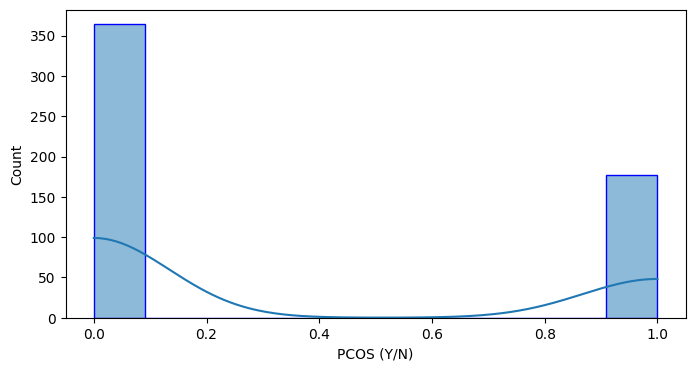

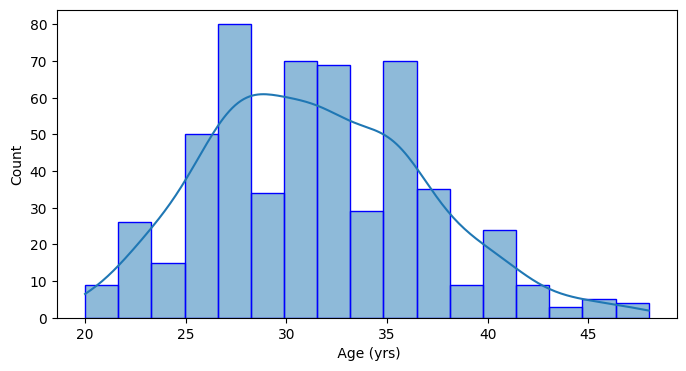

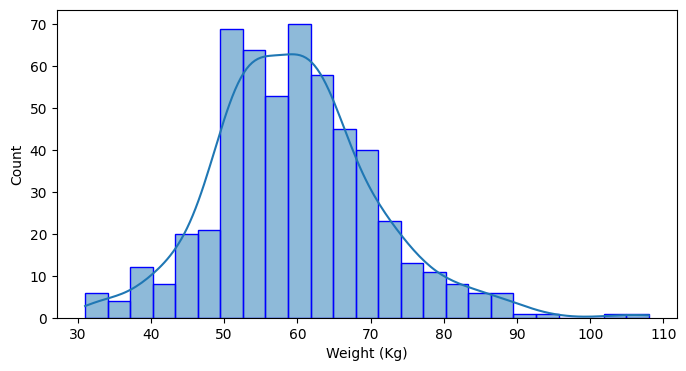

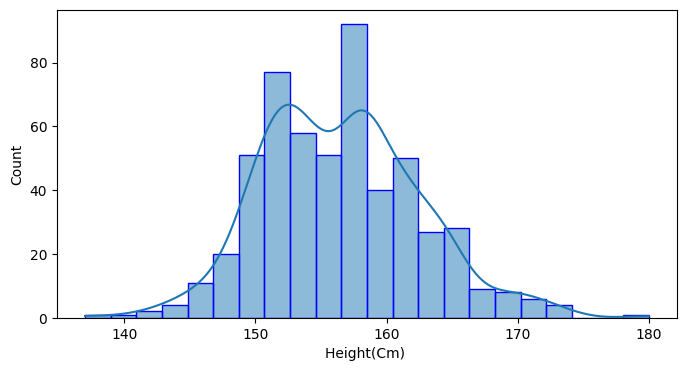

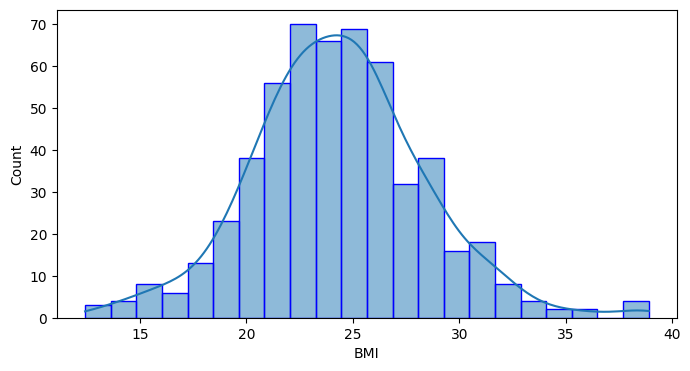

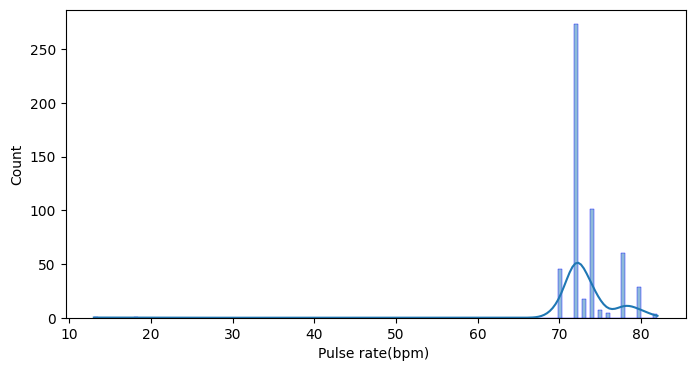

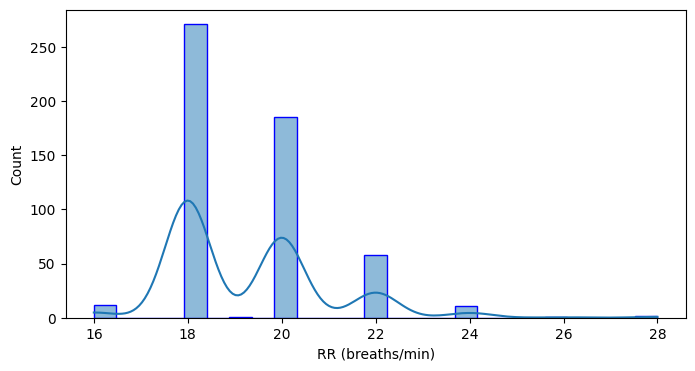

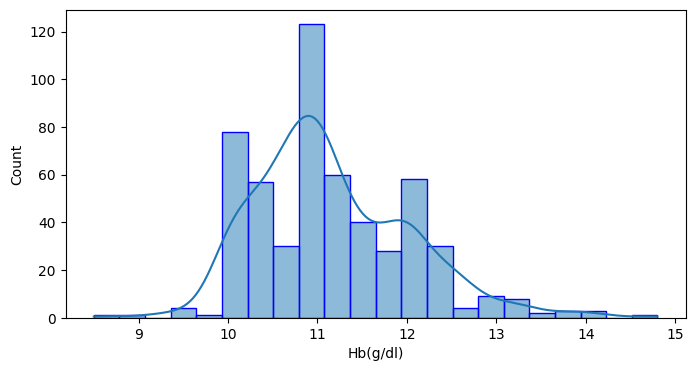

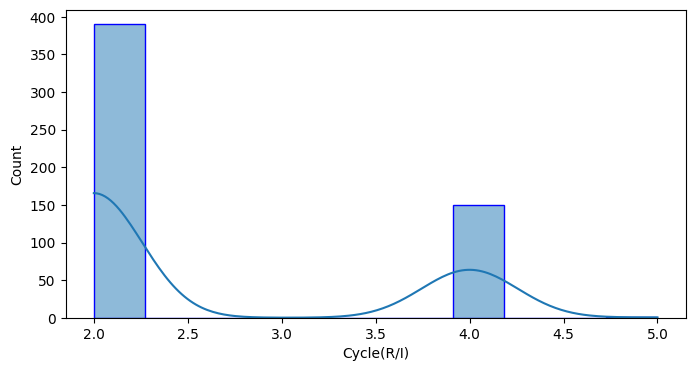

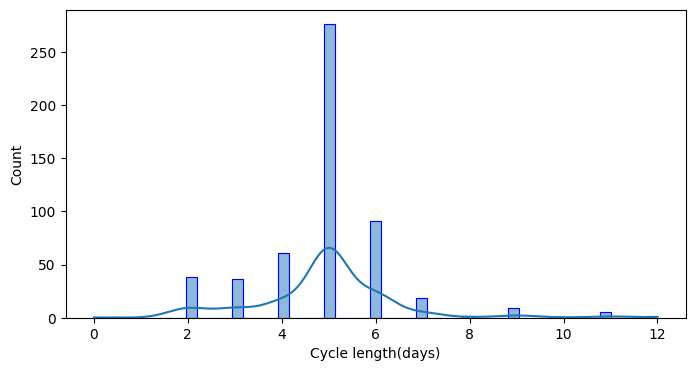

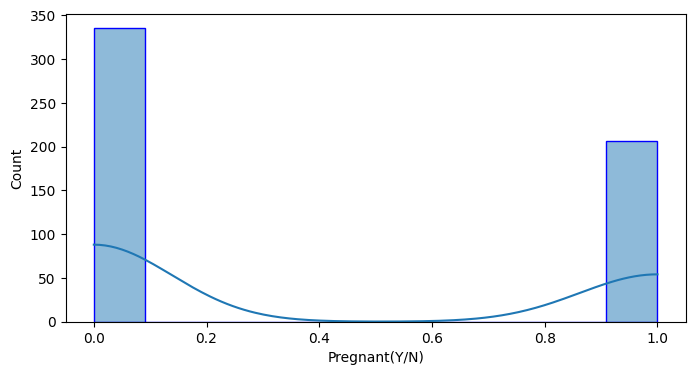

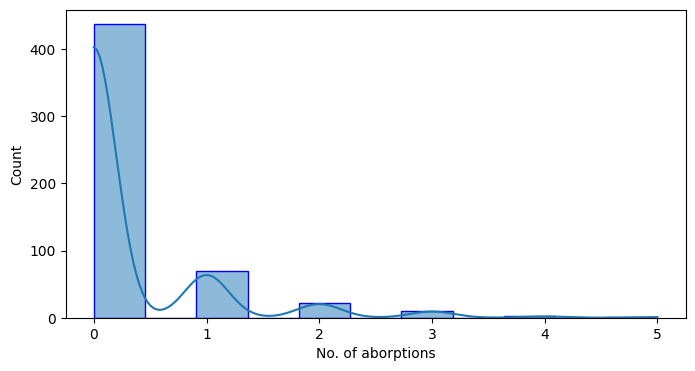

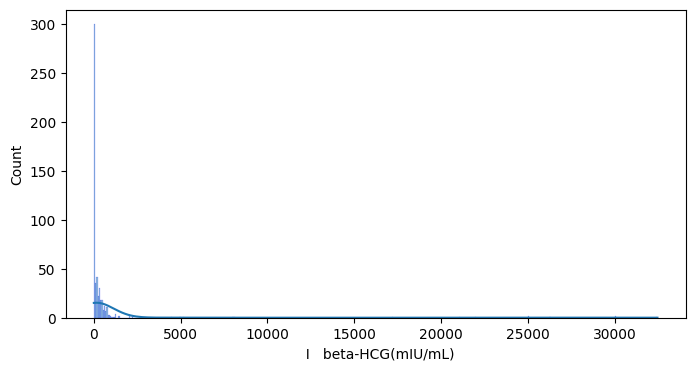

ValueError: Unable to parse string "1.99." at position 123

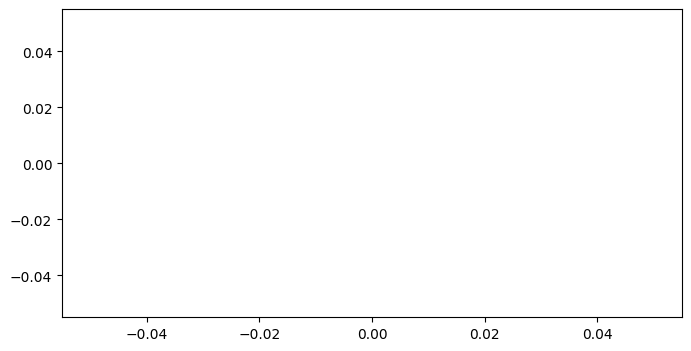

In [34]:
# Plotting all the columns to look at their distributions
for i in df_cleaned.columns:
    plt.figure(figsize = (8, 4))

    sns.histplot(data = df, x = i, kde = True, palette='viridis', edgecolor='blue')

    plt.show()

In [14]:
# Define features (X) and target (y)
X = df_cleaned.drop(columns=['PCOS (Y/N)'])
y = df_cleaned['PCOS (Y/N)']
X.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,28,44.6,152.0,19.300000,15,78,22,10.48,2,5,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,36,65.0,161.5,24.921163,15,74,20,11.70,2,5,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,33,68.8,165.0,25.270891,11,72,18,11.80,2,5,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,37,65.0,148.0,29.674945,13,72,20,12.00,2,5,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,25,52.0,161.0,20.060954,11,72,18,10.00,2,5,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [15]:
y.head()

,PCOS (Y/N)
0,0
1,0
2,1
3,0
4,0


In [39]:
# Normalize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [40]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

In [41]:
# Train logistic regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [42]:
# Evaluate the model
y_pred = log_reg.predict(X_test)
y_prob = log_reg.predict_proba(X_test)[:, 1]

In [43]:
# Classification report and metrics
print("Classification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.90      0.89       110
           1       0.78      0.74      0.76        53

    accuracy                           0.85       163
   macro avg       0.83      0.82      0.82       163
weighted avg       0.84      0.85      0.85       163



In [44]:
roc_auc = roc_auc_score(y_test, y_prob)
accuracy = accuracy_score(y_test, y_pred)
print(f"ROC-AUC Score: {roc_auc:.2f}")
print(f"Accuracy: {accuracy:.2f}")

ROC-AUC Score: 0.93
Accuracy: 0.85
